# Phase 4 Project-Time Series Modelling
* Student name: Angella Bor, Matilda Odalo, Cindy King'ori
* Student pace: Part time

# Which Party Do Voters Favour For Congress: Republican or Democrat?

![Image Alt Text](https://www.rochester.edu/newscenter/wp-content/uploads/2022/11/fea-us-democracy-midterm-elections.jpg)

## Project Background
The United States voting system is a decentralized process, with elections held at federal, state, and local levels, reflecting the principle of representative democracy. The system is characterized by a two-party structure, with the Democratic Party and the Republican Party playing pivotal roles. 

Primary elections precede the general election, allowing party members to choose their candidates. The Electoral College determines the President and Vice President, with states having varying electoral votes based on population. Election Day is the first Tuesday of November in even-numbered years.This said the USA are currently having their primary elections while the general eclections where the president is chosen is to be conducted in 2024.
The Democratic and Republican parties are the two major political parties in the United States, each with distinct ideologies, policy positions, symbols, and colors.

### Democratic Party:

**Symbol:** The official symbol of the Democratic Party is the donkey. The origin of this symbol can be traced back to the 1828 presidential campaign when opponents referred to then-candidate Andrew Jackson as a "jackass." Rather than being offended, Jackson embraced the symbol, and it eventually became associated with the party.

**Color:** The traditional color associated with the Democratic Party is blue. While there is no official designation, media outlets and political analysts commonly use blue to represent Democratic states on electoral maps. The color blue is often linked with a calm and inclusive image.

**Ideology:** The Democratic Party is generally associated with progressive and liberal ideologies. Democrats often advocate for social justice, environmental protection, healthcare reform, workers' rights, and a more active role of government in addressing social and economic issues.

### Republican Party:

**Symbol:** The official symbol of the Republican Party is the elephant. The symbol gained prominence in a political cartoon by Thomas Nast in the 1870s, representing the strength and size of the party. Republicans embraced the image, and the elephant has since become widely associated with the party.

**Color:** The traditional color associated with the Republican Party is red. Similar to the Democrats, there is no official designation, but red is commonly used to represent Republican states on electoral maps. The color red is often associated with a more conservative and traditional image.

**Ideology:** The Republican Party is generally associated with conservative principles. Republicans often advocate for limited government, free-market policies, lower taxes, a strong national defense, and a strict interpretation of the Constitution.

## Business Problem
The business problem is to develop a forecasting model for the future elections. By analyzing historical data on voters polls we can build a predictive model to estimate the potential number of votes each party may receive in upcoming elections. This information will help political strategists, campaign managers, and party leaders make informed decisions about resource allocation, messaging, and targeting specific voter segments to gain a competitive advantage.

## Project Objective
The project's objective is to employ the Time Series Analysis model to reveal patterns, trends, and cyclical behaviors within sequential data points. The importance of time series analysis is particularly pronounced in domains where historical trends offer valuable insights.

1. **Trend Identification:**
   Examine and identify enduring trends in political sentiment present in the dataset, yielding an understanding of evolving support for different political parties or broader shifts in public perception.

2. **Seasonality Exploration:**
   Investigate and comprehend any recurring patterns or seasonality within the political polling data, shedding light on how external factors or events may impact public opinion at specific times.

3. **Accurate Forecasting and Prediction of Election Outcomes:**
   Construct time series models for precise predictions of future generic ballot poll results, providing insights into potential shifts in public opinion over the specified time frame. Employ time series analysis to forecast and analyze potential outcomes of upcoming elections based on historical polling data, aiding political analysts and strategists in anticipating electoral dynamics.

4. **Decision Support for Campaign Strategies:**
   Supply actionable intelligence for political campaigns by utilizing time series insights to inform decision-making processes. This assistance helps campaign strategists tailor their approaches based on observed trends and forecasts. These objectives are designed to guide the analysis towards specific outcomes, contributing to a comprehensive understanding of political dynamics and offering practical insights for decision-makers in the political landscape.

## Project Metholodgy
The project will involve several key steps:
1. **Data Collection, Understanding, Preparation and Cleaning:**
   Gather historical data points at regular intervals. The data should be organized in chronological order.

2. **Data Exploration:**
   Examine the time series data to identify any trends, seasonality, or patterns. Visualization tools like line charts, histograms, and autocorrelation plots can be helpful.

3. **Stationarity Check:**
   Many time series models assume that the data is stationary, meaning that statistical properties do not change over time. Check for stationarity by examining trends and using statistical tests.

4. **Data Transformation:**
   If the data is not stationary, perform transformations such as differencing to stabilize the mean and variance.

5. **Model Selection:**
   Choose an appropriate time series model based on the characteristics of the data. Common models include ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), and more advanced models like Prophet and LSTM (Long Short-Term Memory) for deep learning.

6. **Parameter Estimation:**
   Estimate the parameters of the selected model. This involves fitting the model to the historical data.

7. **Model Validation:**
   Validate the model's performance using a separate dataset not used during the training phase. Common metrics include Mean Squared Error (MSE) and Mean Absolute Error (MAE).

8. **Forecasting:**
   Use the trained model to make predictions about future values of the time series. Evaluate the forecast accuracy and adjust the model as needed.

9. **Model Interpretation:**
   Interpret the results and insights gained from the time series model. Understand the implications of the forecasted values.

## Data Understanding
In this regard, the data was sourced from https://projects.fivethirtyeight.com/polls/generic-ballot/. It comprises of a collection of generic ballot poll results conducted over a specific period of time, capturing sentiments regarding the two political parties.
The file contains the links to the following data:

1. [`generic_polllist.csv`](https://projects.fivethirtyeight.com/generic-ballot-data/generic_polllist.csv) contains a list of generic ballot polls for the current election cycle.
2. [`generic_topline.csv`](https://projects.fivethirtyeight.com/polls/data/generic_ballot_averages.csv) contains a trendline for the generic ballot from the 2018 election cycle to the present.
3. [`generic_topline_historical.csv`](./generic_topline_historical.csv) contains a trendline for the generic ballot for previous election cycles going back to 1996.

## Data Preparation and Cleaning

### Importing the libraries

In [1]:
# Analysis libraries
import pandas as pd
import numpy as np
import itertools

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import time

# Warning libraries
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

# Metric libraries
from sklearn.metrics import mean_squared_error

# Modeling libraries
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from collections import Counter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [2]:
# Importing the generic_topline.csv file
congress_data1 = pd.read_csv('congress-generic-ballot/congress-generic-ballot/generic_ballot_averages.csv')
congress_data1

,candidate,pct_estimate,lo,hi,date,election,cycle
0,Democrats,43.944490,39.333470,48.555500,2017-04-15,2018-11-06,2018
1,Republicans,39.549690,34.938670,44.160710,2017-04-15,2018-11-06,2018
2,Democrats,43.749650,39.140540,48.358760,2017-04-16,2018-11-06,2018
3,Republicans,39.592540,34.983430,44.201650,2017-04-16,2018-11-06,2018
4,Democrats,43.745530,39.135990,48.355080,2017-04-17,2018-11-06,2018
...,...,...,...,...,...,...,...
3917,Republicans,44.008343,41.185657,46.831029,2023-04-03,NaN,2024
3918,Democrats,45.019525,43.059525,46.979525,2023-04-02,NaN,2024
3919,Republicans,44.009914,41.187227,46.832600,2023-04-02,NaN,2024
3920,Democrats,44.815198,42.737420,46.892976,2023-04-01,NaN,2024


In [3]:
# Check the info of the dataset for better understanding
congress_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   candidate     3922 non-null   object 
 1   pct_estimate  3922 non-null   float64
 2   lo            3922 non-null   float64
 3   hi            3922 non-null   float64
 4   date          3922 non-null   object 
 5   election      3480 non-null   object 
 6   cycle         3922 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 214.6+ KB


From the output, we can see that the dataset has 3922 entries and 7 columns. The columns represent candidate, percentage estimate, low estimate, high estimate, date, election, and cycle. The column dtypes are float, int, and object. It is evident that the date column is not considered as a data/time object.
The election column contains missing values.

In [4]:
# Importing the generic_pollist.csv file
congress_data2 = pd.read_csv('congress-generic-ballot/congress-generic-ballot/generic_polllist.csv')
congress_data2

,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,...,rep,adjusted_dem,adjusted_rep,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,All polls,11/7/2022,11/21/2020,11/23/2020,McLaughlin & Associates,C/D,1000.0,lv,0.436672,0.000000,...,47.0,44.377178,44.048764,NaN,NaN,https://mclaughlinonline.com/pols/wp-content/u...,73339,139355,1/20/2021,18:59:21 7 Nov 2022
1,All polls,11/7/2022,12/9/2020,12/13/2020,McLaughlin & Associates,C/D,1000.0,lv,0.414083,0.000000,...,48.0,45.377178,45.048764,NaN,NaN,https://mclaughlinonline.com/pols/wp-content/u...,73755,139356,1/20/2021,18:59:21 7 Nov 2022
2,All polls,11/7/2022,1/20/2021,1/22/2021,Morning Consult,B,10989.0,rv,0.060268,0.000000,...,41.0,44.146218,41.920013,NaN,T,https://morningconsult.com/2022-midterm-electi...,80108,160543,9/8/2022,18:59:21 7 Nov 2022
3,All polls,11/7/2022,1/21/2021,1/23/2021,Morning Consult,B,10764.0,rv,0.058255,0.000000,...,40.0,44.146218,40.920013,NaN,T,https://morningconsult.com/2022-midterm-electi...,80109,160544,9/8/2022,18:59:21 7 Nov 2022
4,All polls,11/7/2022,1/22/2021,1/24/2021,Morning Consult,B,11402.0,rv,0.058168,0.000000,...,41.0,44.146218,41.920013,NaN,T,https://morningconsult.com/2022-midterm-electi...,80110,160545,9/8/2022,18:59:21 7 Nov 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,All polls,11/7/2022,11/3/2022,11/6/2022,YouGov,B+,1071.0,lv,0.526802,0.513446,...,49.0,47.781726,52.272985,NaN,NaN,https://docs.cdn.yougov.com/pyh97ixj6q/econTab...,81591,165185,11/7/2022,18:59:21 7 Nov 2022
1217,All polls,11/7/2022,11/3/2022,11/6/2022,Data for Progress,B,1130.0,lv,0.606264,0.591562,...,52.0,47.705512,49.980782,NaN,NaN,https://www.dataforprogress.org/generic-congre...,81598,165195,11/7/2022,18:59:21 7 Nov 2022
1218,All polls,11/7/2022,11/4/2022,11/5/2022,Morning Consult,B,2005.0,rv,0.176311,0.171272,...,43.0,47.146218,43.920013,NaN,NaN,https://www.politico.com/news/2022/11/07/voter...,81597,165194,11/7/2022,18:59:21 7 Nov 2022
1219,All polls,11/7/2022,11/4/2022,11/6/2022,Trafalgar Group,A-,1099.0,lv,1.071967,1.047020,...,48.4,44.300621,45.275686,NaN,NaN,https://www.thetrafalgargroup.org/news/nat-gen...,81622,165286,11/7/2022,18:59:21 7 Nov 2022


In [5]:
# Check the info of the dataset for better understanding
congress_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subgroup       1221 non-null   object 
 1   modeldate      1221 non-null   object 
 2   startdate      1221 non-null   object 
 3   enddate        1221 non-null   object 
 4   pollster       1221 non-null   object 
 5   grade          1186 non-null   object 
 6   samplesize     1214 non-null   float64
 7   population     1221 non-null   object 
 8   weight         1221 non-null   float64
 9   influence      1221 non-null   float64
 10  dem            1221 non-null   float64
 11  rep            1221 non-null   float64
 12  adjusted_dem   1221 non-null   float64
 13  adjusted_rep   1221 non-null   float64
 14  multiversions  1 non-null      object 
 15  tracking       647 non-null    object 
 16  url            1220 non-null   object 
 17  poll_id        1221 non-null   int64  
 18  question

From the output of congress_data2.info(), we can see that the dataset has 1221 entries and 21 columns. The columns include subgroup, modeldate, startdate, enddate, pollster, grade, samplesize, population, weight, influence, dem, rep, adjusted_dem, adjusted_rep, multiversions, tracking, url, poll_id, question_id, createddate, and timestamp.

The data types of the columns include float64, int64, and object. The column startdate, enddate, modeldate, createddate, and timestamp appear to be in object format, which means that they are not recognized as datetime objects.
The grade, samplesize, multiversions, tracking and url columns have missing data.

In [6]:
# Importing the generic_topline_historical.csv file
congress_data3 = pd.read_csv('congress-generic-ballot/congress-generic-ballot/generic_topline_historical.csv')
congress_data3

,subgroup,modeldate,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo,timestamp
0,All polls,11/9/1995,50.00000,56.30568,43.69432,44.00000,50.30568,37.69432,11:37:15 3 Sep 2020
1,All polls,11/10/1995,50.00000,56.30568,43.69432,44.00000,50.30568,37.69432,11:37:14 3 Sep 2020
2,All polls,11/11/1995,50.00000,56.30568,43.69432,44.00000,50.30568,37.69432,11:37:14 3 Sep 2020
3,All polls,11/12/1995,50.00000,56.30568,43.69432,44.00000,50.30568,37.69432,11:37:14 3 Sep 2020
4,All polls,11/13/1995,50.00000,56.30568,43.69432,44.00000,50.30568,37.69432,11:37:14 3 Sep 2020
...,...,...,...,...,...,...,...,...,...
7664,All polls,11/2/2016,44.75213,50.02578,39.47849,41.80472,46.49487,37.11458,17:17:10 2 Sep 2020
7665,All polls,11/3/2016,44.67450,49.95118,39.39781,41.86721,46.53036,37.20405,17:16:38 2 Sep 2020
7666,All polls,11/4/2016,44.94021,50.15437,39.72605,42.43640,47.29121,37.58159,17:16:06 2 Sep 2020
7667,All polls,11/5/2016,44.94520,50.14077,39.74964,42.36770,47.22380,37.51159,17:15:34 2 Sep 2020


In [7]:
# Check the info of the dataset for better understanding
congress_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669 entries, 0 to 7668
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subgroup      7669 non-null   object 
 1   modeldate     7669 non-null   object 
 2   dem_estimate  7669 non-null   float64
 3   dem_hi        7669 non-null   float64
 4   dem_lo        7669 non-null   float64
 5   rep_estimate  7669 non-null   float64
 6   rep_hi        7669 non-null   float64
 7   rep_lo        7669 non-null   float64
 8   timestamp     7669 non-null   object 
dtypes: float64(6), object(3)
memory usage: 539.4+ KB


According to the output, the dataset contains columns such as subgroup, modeldate, dem_estimate, dem_hi, dem_lo, rep_estimate, rep_hi, rep_lo, and timestamp. The data types of these columns are mainly float64 (6 columns) and object (3 columns).
There are no missing values here.

### Choosing the appropriate dataset for modelling
Considerations:

1. **Time-related Columns:**
   - Look for columns representing time, such as `date` or `timestamp`. These columns are crucial for time series modeling.

2. **Data Types:**
   - Ensure that the time-related columns are in the datetime format.

3. **Data Size:**
   - A larger dataset may provide more information for modeling, but the quality of data is also important.

4. **Relevance to Task:**
   - Consider the specific requirements of your time series modeling task. What are you trying to predict or analyze?

5. **Additional Columns:**
   - Check for additional columns that might provide valuable information for modeling.

Based on the provided information, Dataset 3(congress_data3),is promising for time series modeling as it has relevant time-related columns (`modeldate` and `timestamp`) and numerical columns related to estimates for both Democratic and Republican values.

However we will need to:
- Ensure that the datetime columns are appropriately formatted for time series analysis.

In [8]:
# Check the current datatype for the important columns i.e. modeldate and timestamp
congress_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669 entries, 0 to 7668
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subgroup      7669 non-null   object 
 1   modeldate     7669 non-null   object 
 2   dem_estimate  7669 non-null   float64
 3   dem_hi        7669 non-null   float64
 4   dem_lo        7669 non-null   float64
 5   rep_estimate  7669 non-null   float64
 6   rep_hi        7669 non-null   float64
 7   rep_lo        7669 non-null   float64
 8   timestamp     7669 non-null   object 
dtypes: float64(6), object(3)
memory usage: 539.4+ KB


In [9]:
# Convert modeldate to a datetime format
congress_data3['modeldate'] = pd.to_datetime(congress_data3['modeldate'], errors='coerce')

In [10]:
# Check that the column has been changed
print(congress_data3['modeldate'].dtype)

datetime64[ns]


In [11]:
# Ensure no values were lost during the conversion
congress_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669 entries, 0 to 7668
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   subgroup      7669 non-null   object        
 1   modeldate     7669 non-null   datetime64[ns]
 2   dem_estimate  7669 non-null   float64       
 3   dem_hi        7669 non-null   float64       
 4   dem_lo        7669 non-null   float64       
 5   rep_estimate  7669 non-null   float64       
 6   rep_hi        7669 non-null   float64       
 7   rep_lo        7669 non-null   float64       
 8   timestamp     7669 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 539.4+ KB


In [12]:
# Making the modeldate the index
congress_data3.set_index('modeldate', inplace=True)

In [13]:
# Checking the updated DataFrame
congress_data3.head()

,subgroup,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo,timestamp
modeldate,,,,,,,,
1995-11-09,All polls,50.0,56.30568,43.69432,44.0,50.30568,37.69432,11:37:15 3 Sep 2020
1995-11-10,All polls,50.0,56.30568,43.69432,44.0,50.30568,37.69432,11:37:14 3 Sep 2020
1995-11-11,All polls,50.0,56.30568,43.69432,44.0,50.30568,37.69432,11:37:14 3 Sep 2020
1995-11-12,All polls,50.0,56.30568,43.69432,44.0,50.30568,37.69432,11:37:14 3 Sep 2020
1995-11-13,All polls,50.0,56.30568,43.69432,44.0,50.30568,37.69432,11:37:14 3 Sep 2020


Downsampling and upsampling are not needed here because the data is well balanced. However, relevance of each column is considered.

For a time series analysis with the aim of predicting future elections, the choice of columns depends on the specific modeling approach and the information required for prediction.

1. **`subgroup` (Categorical):**
   - **Relevance:** Not relevant. Depending on the nature of the 'subgroup' column, it could be crucial for analyzing specific demographic or categorical groups.All cells fall under 'All polls' therefore we cannot be able to differentiate the poll associated to a certain position.
   
2. **`modeldate` (Datetime):**
   - **Relevance:** Extremely relevant. This column represents the date associated with the model estimates. It is a crucial variable for time series analysis as it defines the temporal order of the data.

3. **`dem_estimate`, `dem_hi`, `dem_lo` (Float64):**
   - **Relevance:** Highly relevant. These columns contain estimates for the Democratic party, with upper and lower bounds. These are the key variables you want to predict in relation to the Democratic party.

4. **`rep_estimate`, `rep_hi`, `rep_lo` (Float64):**
   - **Relevance:** Highly relevant. Similar to the Democratic party, these columns contain estimates for the Republican party, with upper and lower bounds.

5. **`timestamp` (Object):**
   - **Relevance:** Partially relevant. The 'timestamp' provides additional temporal information in that it show the time of record only. Therefore as much as there is additional information added, it is not relevant in our case. 

### Recommendation:

1. **Keep:**
   - `modeldate`: Essential for time series analysis.
   - `dem_estimate`, `dem_hi`, `dem_lo`: Key variables for predicting Democratic party estimates.
   - `rep_estimate`, `rep_hi`, `rep_lo`: Key variables for predicting Republican party estimates.

2. **Drop:**
   -  `subgroup` and `timestamp`: We already have 'modeldate' in datetime format, and unless there's a specific reason to keep 'timestamp,' it might not provide additional value for your prediction task.

In [14]:
# Drop the 'subgroup' and 'timestamp' columns
congress_data3.drop(['subgroup', 'timestamp'], axis=1, inplace=True)

In [15]:
# Ensuring the columns above were dropped from the dataset
congress_data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7669 entries, 1995-11-09 to 2016-11-06
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dem_estimate  7669 non-null   float64
 1   dem_hi        7669 non-null   float64
 2   dem_lo        7669 non-null   float64
 3   rep_estimate  7669 non-null   float64
 4   rep_hi        7669 non-null   float64
 5   rep_lo        7669 non-null   float64
dtypes: float64(6)
memory usage: 419.4 KB


The time span from November 9, 1995, to November 6, 2016, encompasses a total of six election cycles, commencing with the presidential election years of 1996, 2000, 2004, 2008, 2012, and 2016.

In [16]:
congress_data3.head()

,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo
modeldate,,,,,,
1995-11-09,50.0,56.30568,43.69432,44.0,50.30568,37.69432
1995-11-10,50.0,56.30568,43.69432,44.0,50.30568,37.69432
1995-11-11,50.0,56.30568,43.69432,44.0,50.30568,37.69432
1995-11-12,50.0,56.30568,43.69432,44.0,50.30568,37.69432
1995-11-13,50.0,56.30568,43.69432,44.0,50.30568,37.69432


### Exploratory Data Analysis

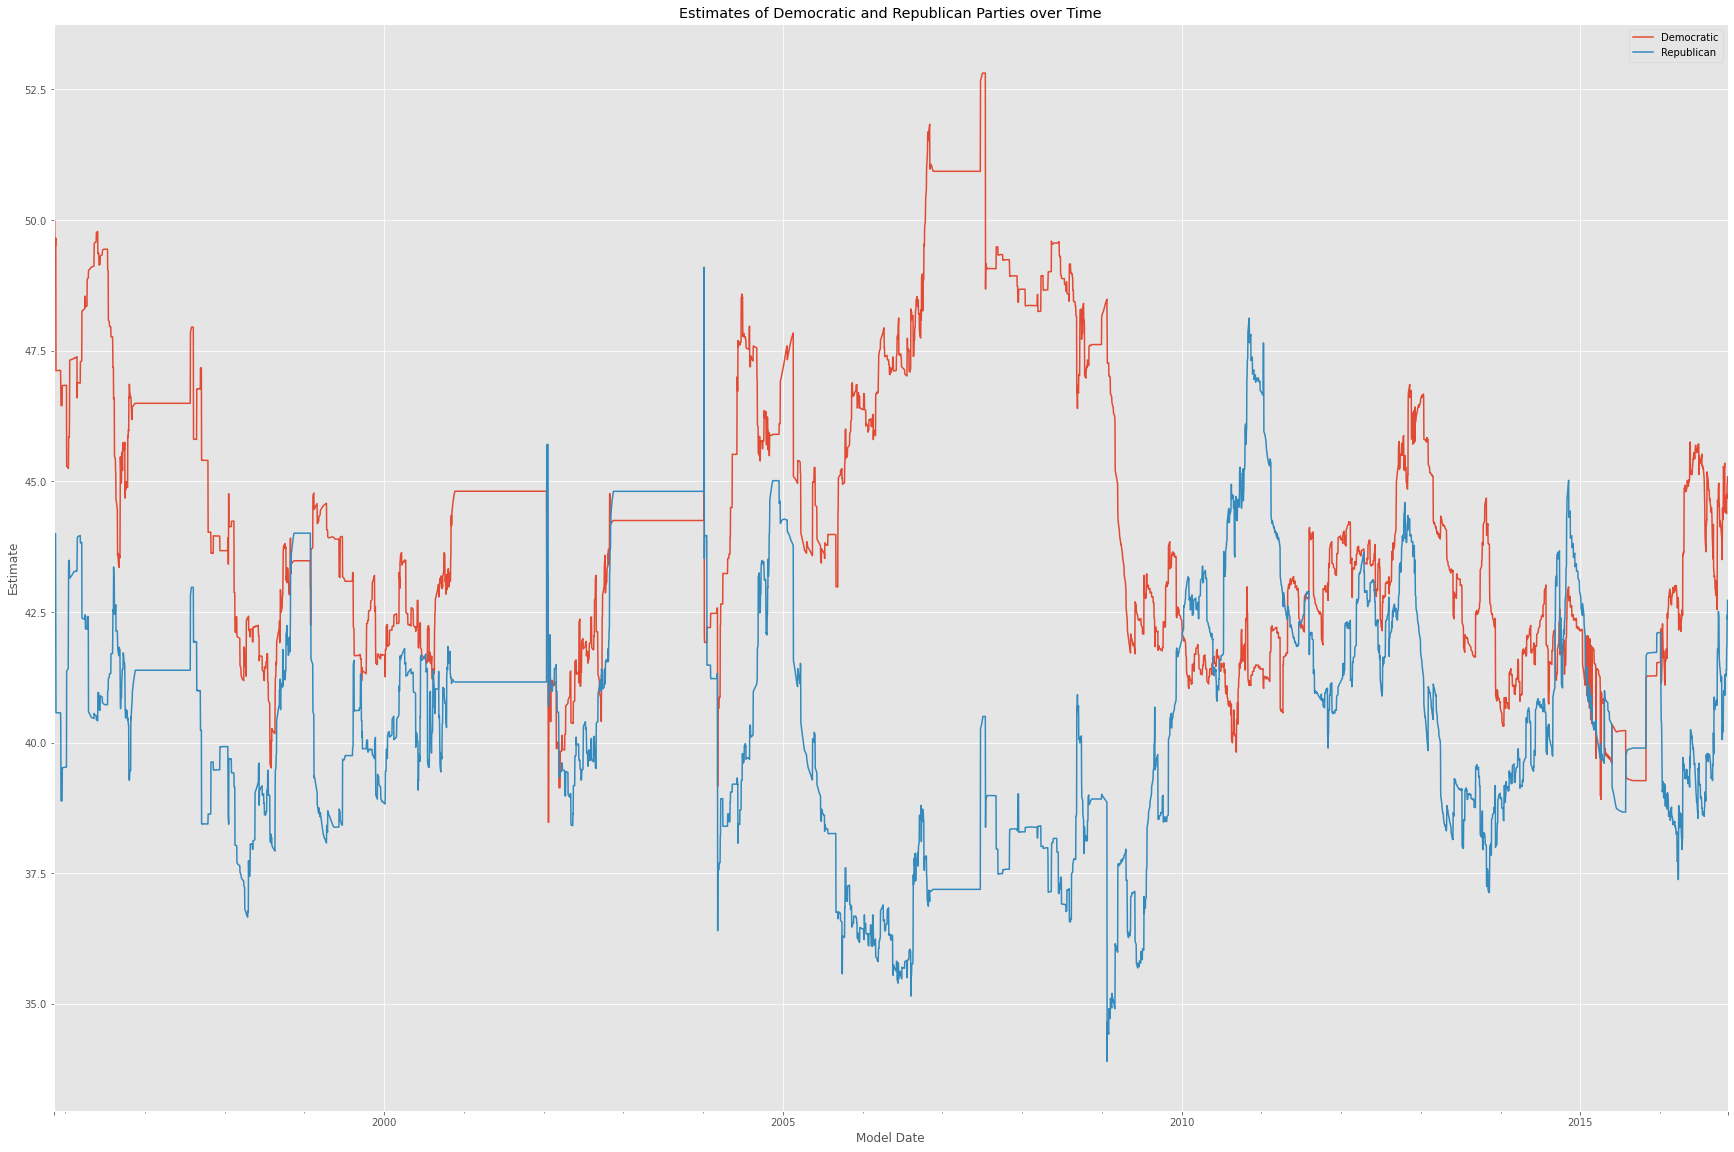

In [17]:
# Visualize the dataframe congress_data3
congress_data3[['dem_estimate', 'rep_estimate']].plot(figsize=(30,20))
plt.xlabel('Model Date')
plt.ylabel('Estimate')
plt.title('Estimates of Democratic and Republican Parties over Time')
plt.legend(['Democratic', 'Republican'])
plt.show()

In [18]:
congress_data3.describe()

,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo
count,7669.000000,7669.000000,7669.000000,7669.000000,7669.000000,7669.000000
mean,44.340392,49.762699,38.918084,40.486304,45.815628,35.156981
std,2.752106,2.711992,2.952493,2.447036,2.447623,2.662204
min,38.474690,43.084470,31.240230,33.897090,40.059580,26.154130
25%,42.183990,48.044380,36.583620,38.678360,44.155010,33.071220
50%,43.953450,49.359790,38.465300,40.501970,45.868220,35.051270
75%,46.385200,51.840560,40.807510,41.781140,47.252980,36.899480
max,52.815420,58.642070,47.673700,49.099460,55.009190,43.189720


For `dem_estimate`:
- **Count (Number of Observations):** There are 7669 observations or data points for the Democratic party estimates.

- **Mean (Average):** The mean of approximately 44.34% indicates that, on average, the Democratic party estimates across the observations are around 44.34%.

- **Standard Deviation (std):** The standard deviation of about 2.75% suggests the amount of variability or dispersion in the Democratic estimates. A higher standard deviation indicates greater variability from the mean.

- **Minimum (Min):** The minimum estimate is approximately 38.47%, representing the lowest observed value.

- **25th Percentile (Q1):** Also known as the first quartile, this value (42.18%) indicates that 25% of the Democratic estimates fall below this value.

- **Median (50th Percentile):** The median, approximately 43.95%, represents the middle value when the estimates are arranged in ascending order. It's not affected by extreme values and provides insight into the central tendency.

- **75th Percentile (Q3):** The third quartile (46.39%) indicates that 75% of the Democratic estimates fall below this value.

- **Maximum (Max):** The maximum estimate is approximately 52.82%, representing the highest observed value.

For `rep_estimate`:
- The same interpretation applies to the Republican party estimates with different values as indicated above in the table.

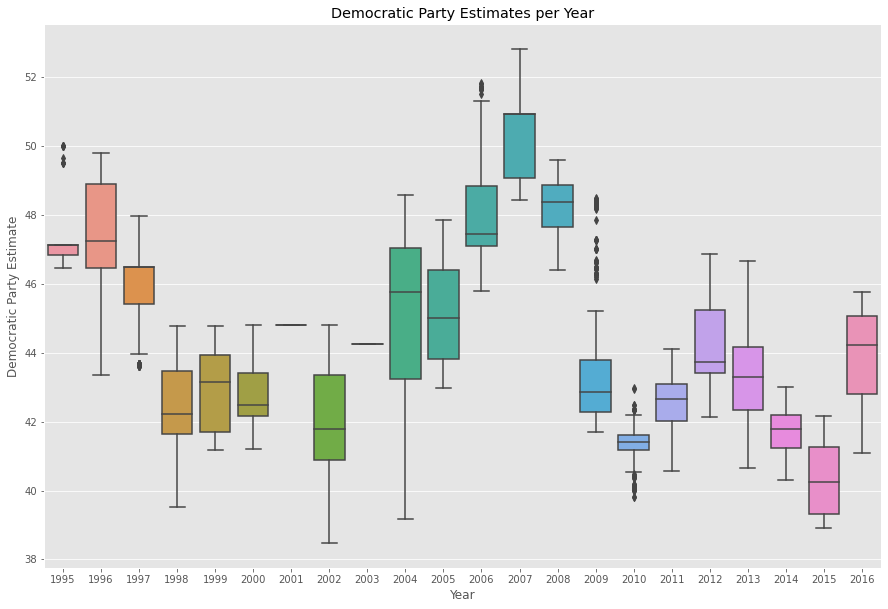

In [19]:
# Visualise the congress_data3, dem_estimate dataset through a box and whisker plot per year
# Create a box and whisker plot for 'dem_estimate' per year
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(x=congress_data3.index.year, y='dem_estimate', data=congress_data3)

# Set the title and labels for the plot
plt.title("Democratic Party Estimates per Year")
plt.xlabel("Year")
plt.ylabel("Democratic Party Estimate")

# Show the plot
plt.show()


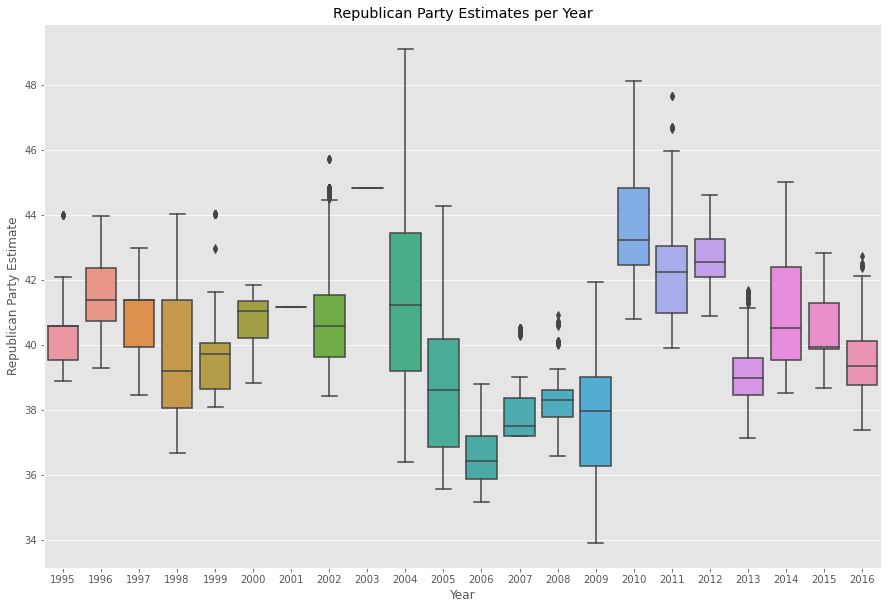

In [20]:
# Visualise the congress_data3, rep_estimate dataset through a box and whisker plot per year
# Create a box and whisker plot for 'rep_estimate' per year
plt.figure(figsize=(15, 10))
sns.boxplot(x=congress_data3.index.year, y='rep_estimate', data=congress_data3)

# Set the title and labels for the plot
plt.title("Republican Party Estimates per Year")
plt.xlabel("Year")
plt.ylabel("Republican Party Estimate")

# Show the plot
plt.show()

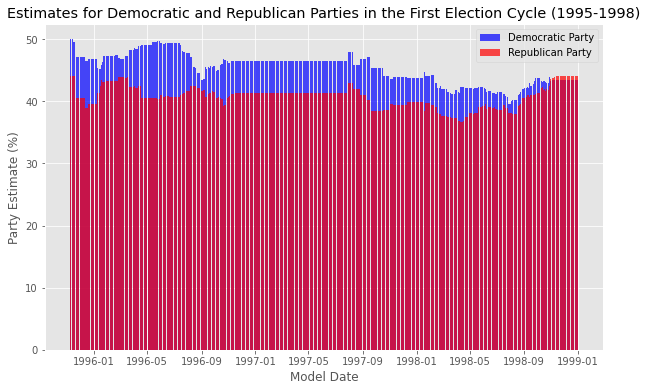

In [21]:
# Visualisation of the data points for the first election cycle 1995-1998 using the congress_data3 dataset
# Extracting the data for the first election cycle 1995-1998
election_cycle1_data = congress_data3['1995-01-01':'1998-12-31']

# Plotting bar charts for Democratic and Republican parties
plt.figure(figsize=(10, 6))

# Bar chart for Democrats
plt.bar(election_cycle1_data.index, election_cycle1_data['dem_estimate'], color='blue', alpha=0.7, label='Democratic Party')

# Bar chart for Republicans
plt.bar(election_cycle1_data.index, election_cycle1_data['rep_estimate'], color='red', alpha=0.7, label='Republican Party')

plt.xlabel('Model Date')
plt.ylabel('Party Estimate (%)')
plt.title('Estimates for Democratic and Republican Parties in the First Election Cycle (1995-1998)')
plt.legend()
plt.grid(True)
plt.show()


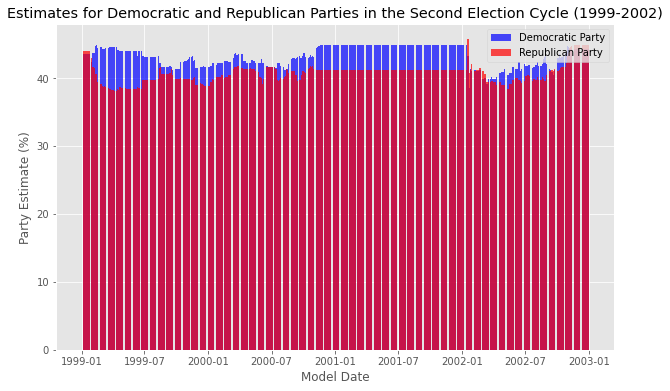

In [22]:
# Visualisation of the data points for the second election cycle 1999-2002 using the congress_data3 dataset
# Extracting the data for the second election cycle 1999-2002
election_cycle2_data = congress_data3['1999-01-01':'2002-12-31']

# Plotting bar charts for Democratic and Republican parties
plt.figure(figsize=(10,6))

# Bar chart for Democrats
plt.bar(election_cycle2_data.index, election_cycle2_data['dem_estimate'], color='blue', alpha=0.7, label='Democratic Party')

# Bar chart for Republicans
plt.bar(election_cycle2_data.index, election_cycle2_data['rep_estimate'], color='red', alpha=0.7, label='Republican Party')

plt.xlabel('Model Date')
plt.ylabel('Party Estimate (%)')
plt.title('Estimates for Democratic and Republican Parties in the Second Election Cycle (1999-2002)')
plt.legend()
plt.grid(True)
plt.show()


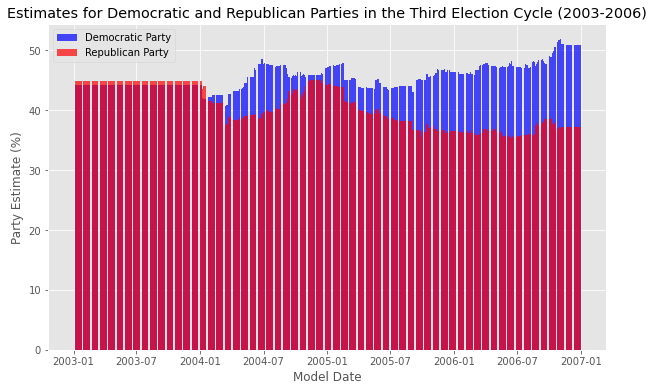

In [23]:
# Visualisation of the data points for the third election cycle 2003-2006 using the congress_data3 dataset
# Extracting the data for the third election cycle 2003-2006
election_cycle3_data = congress_data3['2003-01-01':'2006-12-31']

# Plotting bar charts for Democratic and Republican parties
plt.figure(figsize=(10, 6))

# Bar chart for Democrats
plt.bar(election_cycle3_data.index, election_cycle3_data['dem_estimate'], color='blue', alpha=0.7, label='Democratic Party')

# Bar chart for Republicans
plt.bar(election_cycle3_data.index, election_cycle3_data['rep_estimate'], color='red', alpha=0.7, label='Republican Party')

plt.xlabel('Model Date')
plt.ylabel('Party Estimate (%)')
plt.title('Estimates for Democratic and Republican Parties in the Third Election Cycle (2003-2006)')
plt.legend()
plt.grid(True)
plt.show()


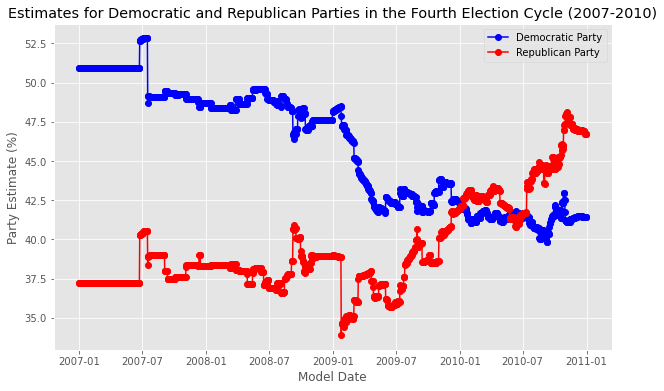

In [24]:
# Visualisation of the data points for the fourth election cycle 2007-2010 using the congress_data3 dataset
# Extracting the data for the fourth election cycle 2007-2010
election_cycle4_data = congress_data3['2007-01-01':'2010-12-31']

# Plotting line plots for Democratic and Republican parties
plt.figure(figsize=(10, 6))

# Line plot for Democrats
plt.plot(election_cycle4_data.index, election_cycle4_data['dem_estimate'], color='blue', label='Democratic Party', marker='o')

# Line plot for Republicans
plt.plot(election_cycle4_data.index, election_cycle4_data['rep_estimate'], color='red', label='Republican Party', marker='o')

plt.xlabel('Model Date')
plt.ylabel('Party Estimate (%)')
plt.title('Estimates for Democratic and Republican Parties in the Fourth Election Cycle (2007-2010)')
plt.legend()
plt.grid(True)
plt.show()


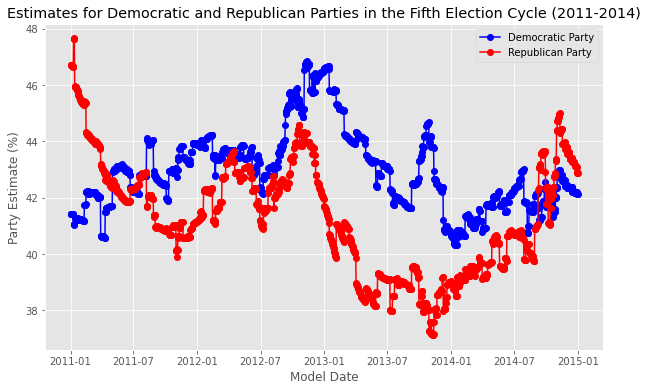

In [25]:
# Visualisation of the data points for the fifth election cycle 2011-2014 using the congress_data3 dataset
# Extracting the data for the fifth election cycle 2011-2014
election_cycle5_data = congress_data3['2011-01-01':'2014-12-31']

# Plotting line plots for Democratic and Republican parties
plt.figure(figsize=(10, 6))

# Line plot for Democrats
plt.plot(election_cycle5_data.index, election_cycle5_data['dem_estimate'], color='blue', label='Democratic Party', marker='o')

# Line plot for Republicans
plt.plot(election_cycle5_data.index, election_cycle5_data['rep_estimate'], color='red', label='Republican Party', marker='o')

plt.xlabel('Model Date')
plt.ylabel('Party Estimate (%)')
plt.title('Estimates for Democratic and Republican Parties in the Fifth Election Cycle (2011-2014)')
plt.legend()
plt.grid(True)
plt.show()


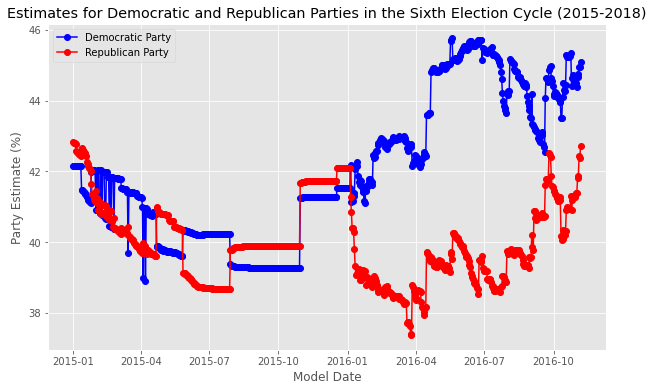

In [26]:
# Visualisation of the data points for the sixth election cycle 2015-2018 using the congress_data3 dataset
# Extracting the data for the sixth election cycle 2015-2018
election_cycle6_data = congress_data3['2015-01-01':'2018-12-31']

# Plotting line plots for Democratic and Republican parties
plt.figure(figsize=(10, 6))

# Line plot for Democrats
plt.plot(election_cycle6_data.index, election_cycle6_data['dem_estimate'], color='blue', label='Democratic Party', marker='o')

# Line plot for Republicans
plt.plot(election_cycle6_data.index, election_cycle6_data['rep_estimate'], color='red', label='Republican Party', marker='o')

plt.xlabel('Model Date')
plt.ylabel('Party Estimate (%)')
plt.title('Estimates for Democratic and Republican Parties in the Sixth Election Cycle (2015-2018)')
plt.legend()
plt.grid(True)
plt.show()


### Time Series Modelling

##### Stationarity & Trend

Checking for stationarity is crucial in time series analysis for several reasons:

1. **Model Assumptions:** Many time series models, such as autoregressive integrated moving average (ARIMA) and seasonal decomposition of time series (STL), assume that the underlying time series is stationary. Violating this assumption can lead to inaccurate model results.

2. **Mean and Variance Stability:** Stationarity implies that the mean and variance of the time series remain constant over time. If a time series is non-stationary, it may exhibit trends or seasonality, making it challenging to identify patterns and make reliable predictions.

3. **Statistical Testing:** Stationarity is often a prerequisite for applying statistical tests and models. For example, unit root tests like the Augmented Dickey-Fuller (ADF) test are commonly used to check for stationarity. If the time series is non-stationary, differencing may be applied to achieve stationarity.

4. **Model Performance:** Stationary time series are generally easier to model and forecast. Stationary series exhibit consistent behavior over time, allowing for the application of simpler models that can capture patterns effectively.

5. **Interpretability:** A stationary time series is often more interpretable because its statistical properties do not change over time. This makes it easier to draw meaningful conclusions and insights from the data.

To check for stationarity, common techniques include visual inspection of time series plots, summary statistics, and formal statistical tests like the ADF test. If the time series is found to be non-stationary, transformations such as differencing may be applied to achieve stationarity before modeling.
When time series models are not stationary, we say there is a trend.

##### Moving Averages/ Rolling Statistics
##### Trend determination

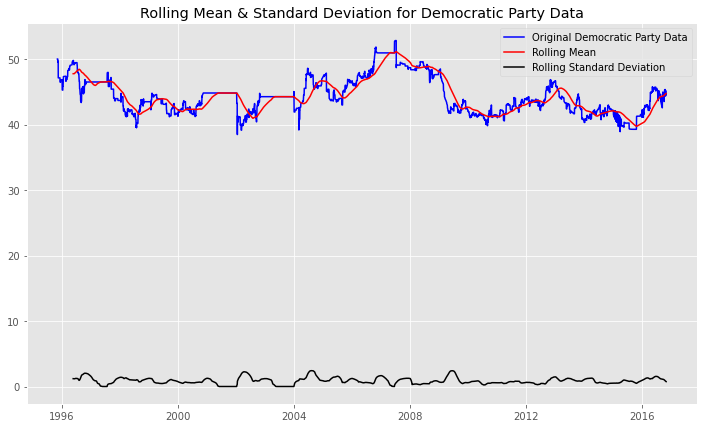

In [27]:
#Visualise the congress_data3 dataset using the moving averages method to determine the trend for the Democratic party
democratic_data = congress_data3['dem_estimate']

# Calculate the rolling mean and standard deviation with a window of 8
roll_mean = democratic_data.rolling(window=200, center=False).mean()
roll_std = democratic_data.rolling(window=200, center=False).std()

# Plot the original data, rolling mean, and rolling standard deviation
fig = plt.figure(figsize=(12, 7))
plt.plot(democratic_data, color='blue', label='Original Democratic Party Data')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Democratic Party Data')
plt.show()


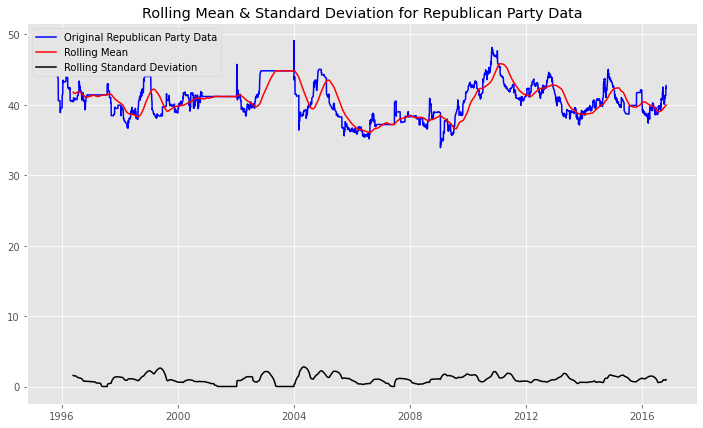

In [28]:
#Visualise the congress_data3 dataset using the moving averages method to determine the trend for the Republican party
republican_data = congress_data3['rep_estimate']

# Calculate the rolling mean and standard deviation with a window of 8
roll_mean_rep = republican_data.rolling(window=200, center=False).mean()
roll_std_rep = republican_data.rolling(window=200, center=False).std()

# Plot the original data, rolling mean, and rolling standard deviation
fig = plt.figure(figsize=(12, 7))
plt.plot(republican_data, color='blue', label='Original Republican Party Data')
plt.plot(roll_mean_rep, color='red', label='Rolling Mean')
plt.plot(roll_std_rep, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Republican Party Data')
plt.show()


Based on the rolling mean and standard deviation depicted in the Democratic graphs above, it can be inferred that the time series exhibits non-stationary behavior. This is evidenced by the observed fluctuations in the lines over time, indicating a lack of constancy. While for the Republican party, the fluctuations are more constant indicating stationarity for the dataset.

##### Dickey-Fuller Test
We use this to confirm the above conclusion

In [29]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test for Democratic party data
result_dem = adfuller(democratic_data)

## Extract and display test results in a user friendly manner
result_dem_output = pd.Series(result_dem[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in result_dem[4].items():
    result_dem_output['Critical Value (%s)'%key] = value
print(result_dem)

(-2.8264428232356877, 0.054594744241164624, 17, 7651, {'1%': -3.431204985664426, '5%': -2.8619178400308085, '10%': -2.566971119741413}, -2369.6518879658706)


In [30]:
print ('Results of Democratic Party Dickey-Fuller test: \n')

print(result_dem_output)

Results of Democratic Party Dickey-Fuller test: 

Test Statistic                   -2.826443
p-value                           0.054595
#Lags Used                       17.000000
Number of Observations Used    7651.000000
Critical Value (1%)              -3.431205
Critical Value (5%)              -2.861918
Critical Value (10%)             -2.566971
dtype: float64


These results suggest that the Democratic Party data exhibits marginal non-stationarity, as the p-value is slightly above the conventional significance level of 0.05. The Test Statistic is less negative than the critical values, supporting the conclusion of non-stationarity.

In [31]:
# Perform the Dickey-Fuller test for Republican party data
result_rep = adfuller(republican_data)

## Extract and display test results in a user friendly manner
result_rep_output = pd.Series(result_rep[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in result_rep[4].items():
    result_rep_output['Critical Value (%s)'%key] = value
print(result_rep)

(-3.9157212991282373, 0.001922145627970563, 12, 7656, {'1%': -3.4312044271008246, '5%': -2.8619175932227554, '10%': -2.566970988362301}, -999.1798760499387)


In [32]:
print ('Results of Republican Party Dickey-Fuller test: \n')

print(result_rep_output)

Results of Republican Party Dickey-Fuller test: 

Test Statistic                   -3.915721
p-value                           0.001922
#Lags Used                       12.000000
Number of Observations Used    7656.000000
Critical Value (1%)              -3.431204
Critical Value (5%)              -2.861918
Critical Value (10%)             -2.566971
dtype: float64


These results indicate that the Republican Party data is stationary. The Test Statistic is more negative than the critical values, and the p-value is significantly below the conventional significance level of 0.05. This supports the conclusion of stationarity for the Republican Party data.

Inorder to perform anymodeling or approximating the trend and seasonality within the series should be eliminated from the series to achieve a stationary series. In this case the democratic party data that was not stationary.

##### Lag Plots
Are scatter plots of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

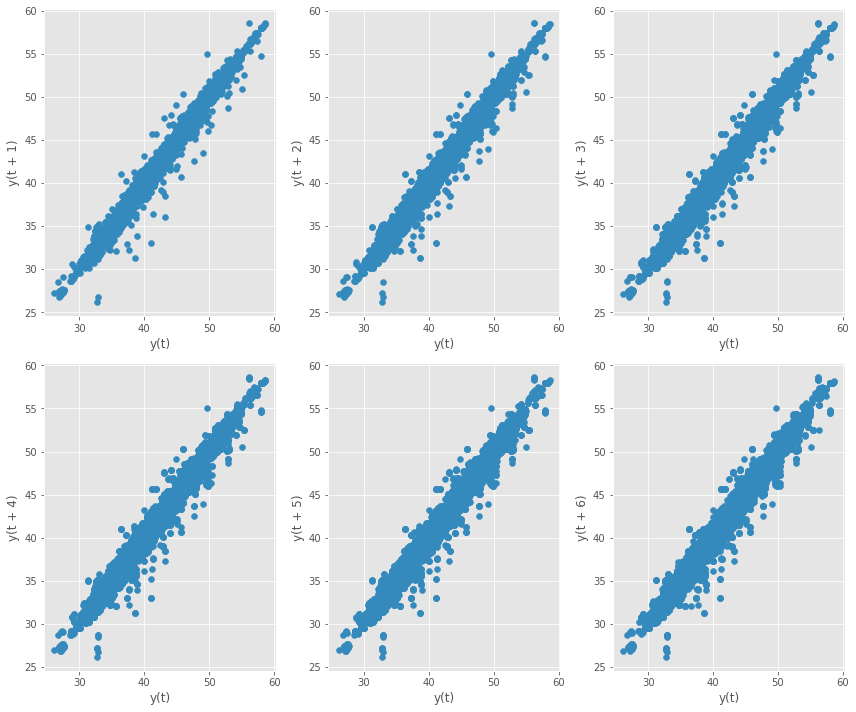

In [33]:
#Visualise a lag plot for the congress_data3 dataset
from pandas.plotting import lag_plot

plt.figure(figsize=(12, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    lag_plot(congress_data3, lag=i)

plt.tight_layout()
plt.show()

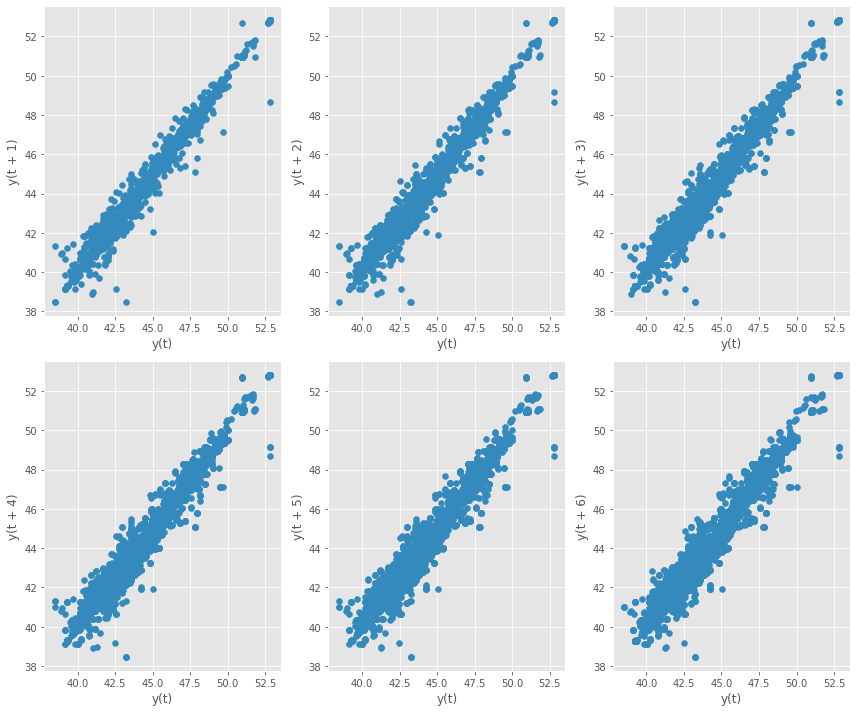

In [34]:
#Visualise a lag plot for the democratic_data dataset 
from pandas.plotting import lag_plot

plt.figure(figsize=(12, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    lag_plot(democratic_data, lag=i)

plt.tight_layout()
plt.show()

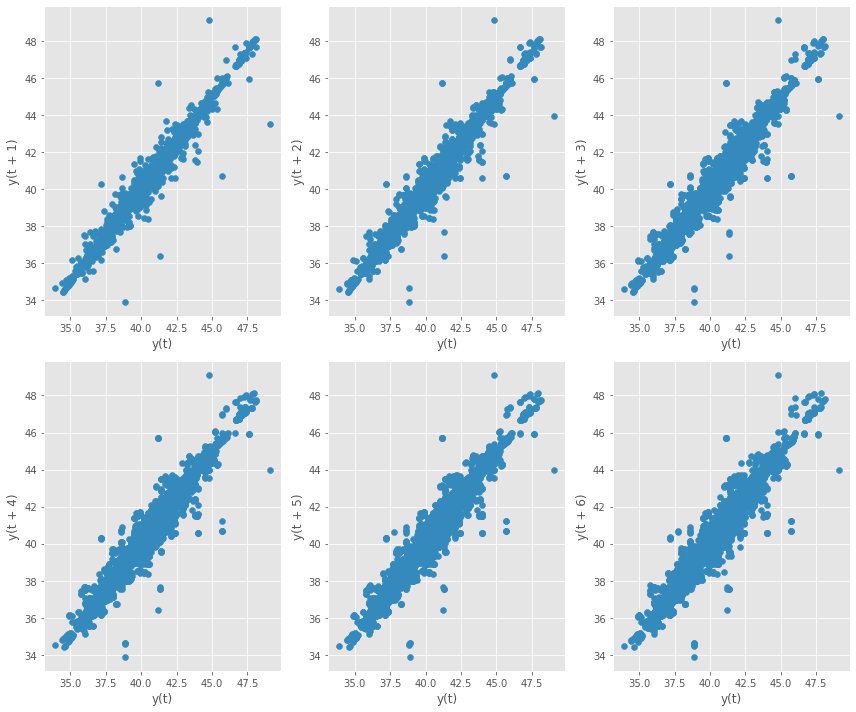

In [35]:
#Visualise a lag plot for the republican_data dataset 
from pandas.plotting import lag_plot

plt.figure(figsize=(12, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    lag_plot(republican_data, lag=i)

plt.tight_layout()
plt.show()

### Time Series Decomposition
This involves breaking down a time series into its fundamental components, which include trend, seasonality, and residual (or error) components. This process helps understand the underlying patterns and structures within the time series data. The primary goal of decomposition is to isolate and analyze these individual components for better modeling and forecasting. 
The three main components of time series decomposition are:

1. Trend & Staionarity:
The trend component represents the long-term movement or direction in the time series. It captures the underlying growth or decline in the data over an extended period. Trends can be upward, downward, or flat, and they provide insights into the overall direction of the series.

2. Seasonality:
The seasonality component accounts for regular and repeating patterns that occur at fixed intervals within the time series. Seasonal patterns often correspond to specific time frames, such as daily, weekly, monthly, or yearly cycles. Identifying and understanding seasonality is crucial for accurate forecasting, especially in fields like retail, finance, and climate science.

3. Residual (Error):
The residual component represents the random fluctuations or noise in the data that cannot be attributed to the trend or seasonality. It reflects the unexplained variability and measurement errors present in the time series. Analyzing residuals helps assess the model's ability to capture the underlying patterns and identify any remaining irregularities.

###### Decomposition of the Democratic Dataset

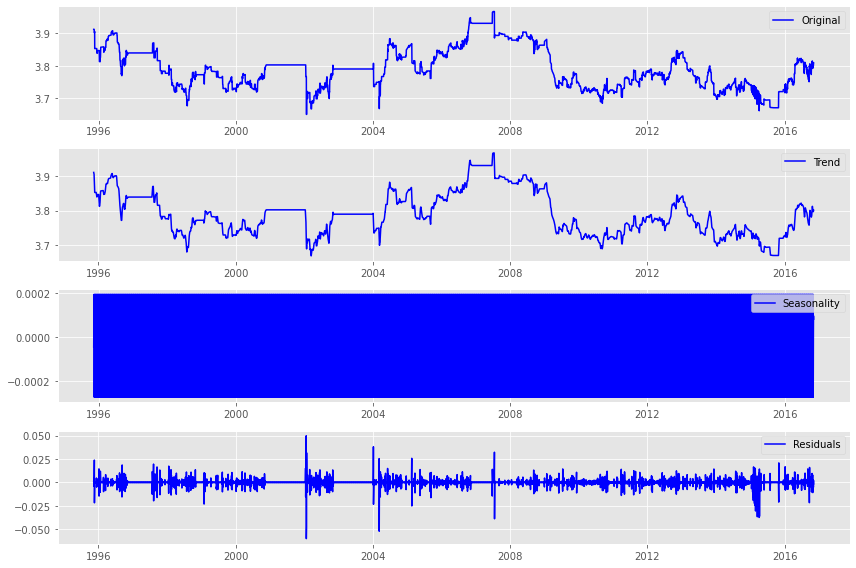

In [36]:
# Democratic data
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition_dem = seasonal_decompose(np.log(democratic_data))

# Gather the trend, seasonality, and residuals 
trend_dem = decomposition_dem.trend
seasonal_dem = decomposition_dem.seasonal
residual_dem = decomposition_dem.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(democratic_data), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_dem, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_dem, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_dem, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()


In [37]:
# Drop missing values from residuals 
democratic_data_log_decompose = residual_dem
democratic_data_log_decompose.dropna(inplace=True)

Dickey-Fuller Test Statistic: -26.13798933733624
p-value: 0.0
Critical Values: {'1%': -3.4312076769674644, '5%': -2.8619190292148153, '10%': -2.5669717527595175}


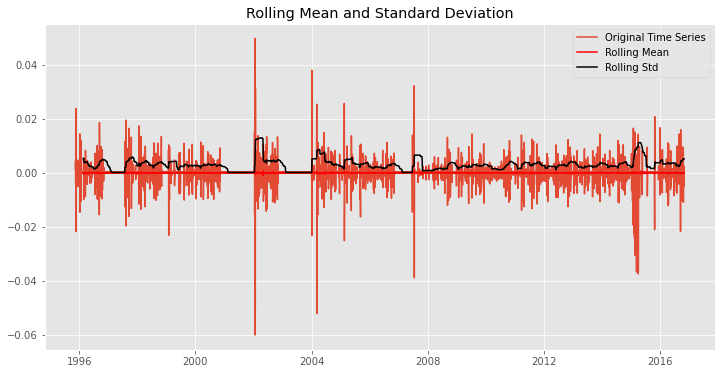

In [38]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check_dem(time_series):
    # Calculate rolling statistics
    rolling_mean = time_series.rolling(window=100).mean()
    rolling_std = time_series.rolling(window=100).std()

    # Perform Dickey-Fuller test
    df_test = adfuller(time_series, autolag='AIC')

    # Print Dickey-Fuller test results
    print(f'Dickey-Fuller Test Statistic: {df_test[0]}')
    print(f'p-value: {df_test[1]}')
    print(f'Critical Values: {df_test[4]}')

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original Time Series')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='black')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

# Now use the stationarity_check function
stationarity_check_dem(democratic_data_log_decompose)

The Dickey-Fuller Test Statistic is a measure used to determine the stationarity of a time series. Here are the key components of the test results you've provided:

- **Test Statistic: -26.137989337336474**
  - The more negative this statistic, the stronger the evidence against the null hypothesis (non-stationarity). In this case, a very negative value indicates a significant rejection of the null hypothesis.

- **p-value: 0.0**
  - The p-value is compared to a significance level (commonly 0.05) to decide whether to reject the null hypothesis. A p-value of 0.0 means that the null hypothesis is rejected at any reasonable significance level, providing strong evidence that the series is stationary.

- **Critical Values: {'1%': -3.4312076769674644, '5%': -2.8619190292148153, '10%': -2.5669717527595175}**
  - Critical values represent thresholds at which you would reject the null hypothesis. In this case, the test statistic is compared to these critical values. If the test statistic is more extreme (in this case, more negative) than the critical values, you reject the null hypothesis.

In summary, the Dickey-Fuller test results suggest that your time series is stationary, as indicated by the very low p-value and the highly negative test statistic. This is a positive outcome, as stationarity is a common assumption for time series modeling, including ARIMA modeling.

###### Decomposition of the Republican dataset

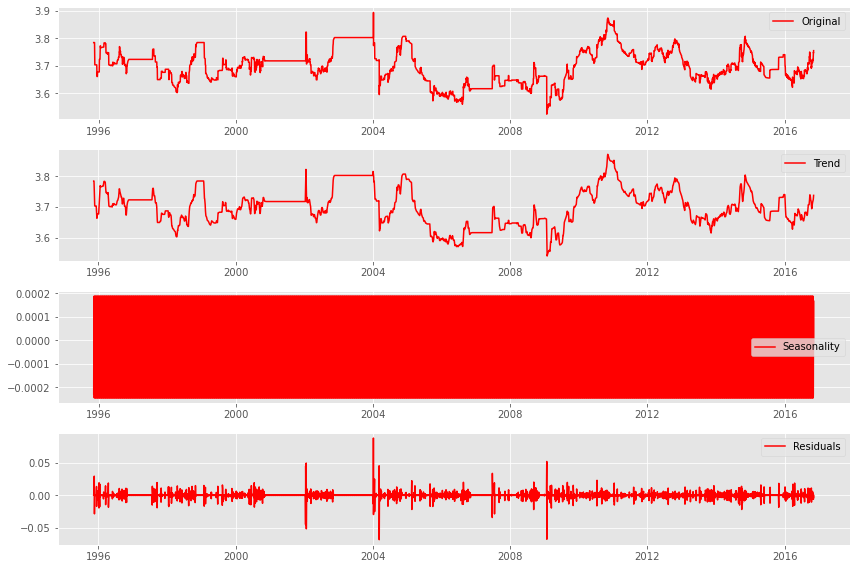

In [39]:
# Detrending the republican_data through decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition_rep = seasonal_decompose(np.log(republican_data))

# Gather the trend, seasonality, and residuals 
trend_rep = decomposition_rep.trend
seasonal_rep = decomposition_rep.seasonal
residual_rep = decomposition_rep.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(republican_data), label='Original', color='red')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_rep, label='Trend', color='red')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_rep, label='Seasonality', color='red')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_rep, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()

In [40]:
#Drop the missing residuals
republican_data_log_decompose = residual_rep
republican_data_log_decompose.dropna(inplace=True)

Dickey-Fuller Test Statistic: -24.228495882629705
p-value: 0.0
Critical Values: {'1%': -3.431207789472831, '5%': -2.861919078926616, '10%': -2.5669717792217592}


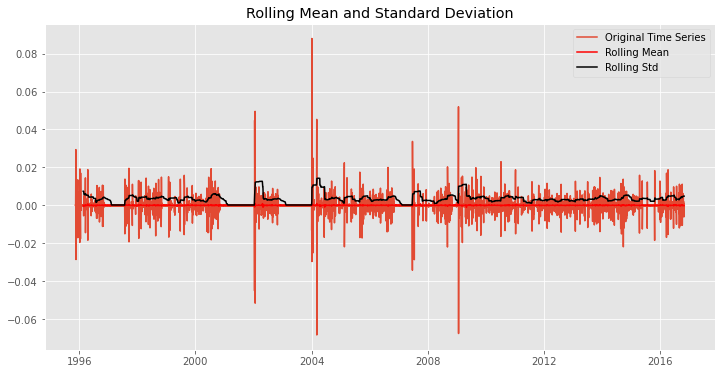

In [41]:
# Function for stationarity check
def stationarity_check_rep(time_series):
    # Calculate rolling statistics
    rolling_mean = time_series.rolling(window=100).mean()
    rolling_std = time_series.rolling(window=100).std()

    # Perform Dickey-Fuller test
    df_test = adfuller(time_series, autolag='AIC')

    # Print Dickey-Fuller test results
    print(f'Dickey-Fuller Test Statistic: {df_test[0]}')
    print(f'p-value: {df_test[1]}')
    print(f'Critical Values: {df_test[4]}')

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Original Time Series')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='black')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

# Use the stationarity_check function for republican_data_log_decompose
stationarity_check_rep(republican_data_log_decompose)

The Dickey-Fuller test statistic for the Republican Party time series is approximately -24.23, and the p-value is 0.0. Since the p-value is less than the significance level (commonly 0.05), we can reject the null hypothesis. The critical values also indicate strong evidence against the null hypothesis. These results suggest that the Republican Party time series is stationary after the log transformation and decomposition, indicating that the trend has been effectively removed.

###### Detrending of the congress_data3 dataset using Differences model

In [42]:
congress_data3_diff = congress_data3.diff(periods=1)

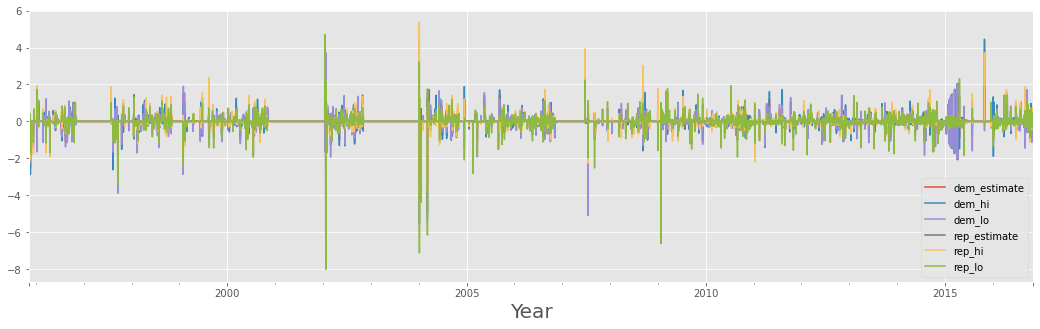

In [43]:
congress_data3_diff.plot(figsize=(18,5))
plt.xlabel('Year', fontsize=20);

##### Correlation

In [44]:
congress_data3_diff.corr()

,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo
dem_estimate,1.000000,0.911829,0.934210,0.218994,0.107051,0.278897
dem_hi,0.911829,1.000000,0.705379,0.139743,0.128170,0.128785
dem_lo,0.934210,0.705379,1.000000,0.256668,0.073458,0.369607
rep_estimate,0.218994,0.139743,0.256668,1.000000,0.901385,0.934570
rep_hi,0.107051,0.128170,0.073458,0.901385,1.000000,0.688348
rep_lo,0.278897,0.128785,0.369607,0.934570,0.688348,1.000000


- **Positive Correlation:** Values close to 1 indicate a strong positive correlation, meaning that as one variable increases, the other tends to increase as well.

- **Negative Correlation:** Values close to -1 indicate a strong negative correlation, meaning that as one variable increases, the other tends to decrease.

- **Correlation Near 0:** A value close to 0 indicates a weak or no linear correlation between the variables.

Interpreting the provided correlation matrix:

1. **Democratic Estimates:**
   - Positive correlation between `dem_estimate` and `dem_hi` (0.911829) and `dem_lo` (0.934210), indicating that they tend to move together positively.
   - Weak positive correlation between `dem_estimate` and `rep_estimate` (0.218994).

2. **Republican Estimates:**
   - Positive correlation between `rep_estimate` and `rep_hi` (0.901385) and `rep_lo` (0.934570), indicating that they tend to move together positively.
   - Weak positive correlation between `rep_estimate` and `dem_estimate` (0.218994).

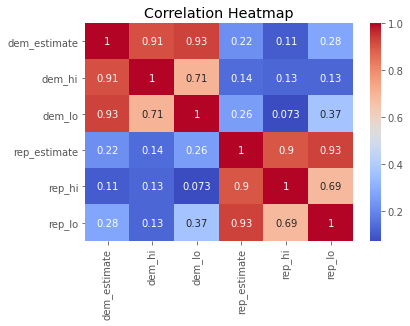

In [45]:
#Visualise the correlation above
sns.heatmap(congress_data3_diff.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

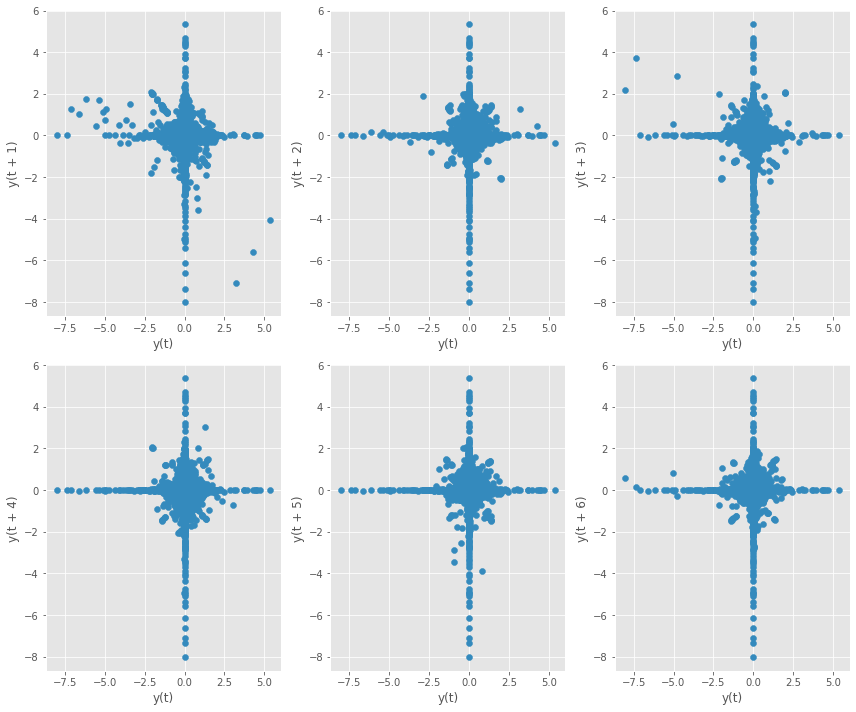

In [46]:
# Confirm that the trend has changed using the Lag visualisation method
plt.figure(figsize=(12, 10))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    lag_plot(congress_data3_diff, lag=i)

plt.tight_layout()
plt.show()

##### Autocorrelation Function

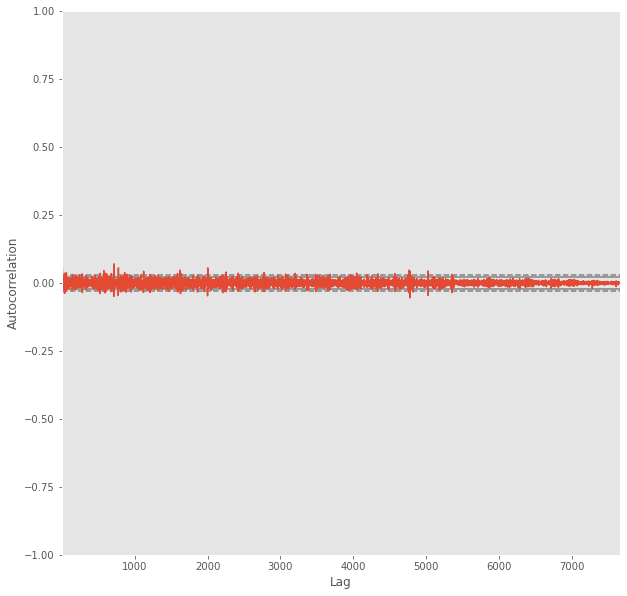

In [47]:
plt.figure(figsize=(10,10))
pd.plotting.autocorrelation_plot(democratic_data_log_decompose);

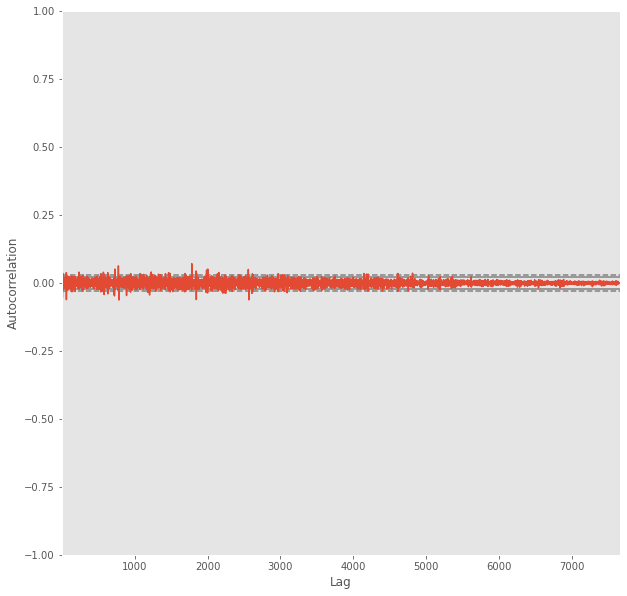

In [48]:
plt.figure(figsize=(10,10))
pd.plotting.autocorrelation_plot(republican_data_log_decompose);

##### Partial Autocorrelation 
This controls for the values of the time series at all shorter lags unlike the autocorrelation function which does not.

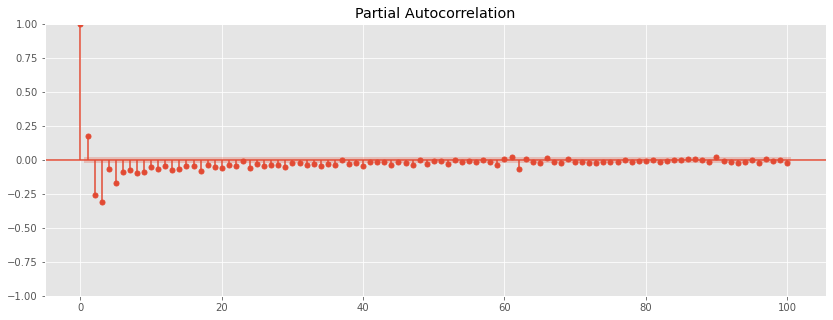

In [49]:
# Democratic party
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(democratic_data_log_decompose, lags=100);

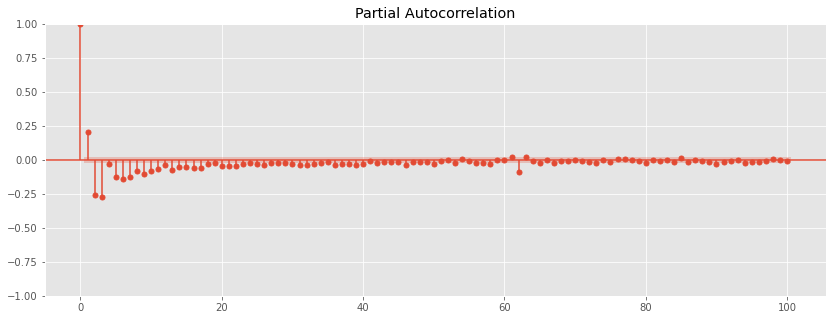

In [50]:
# Republican party
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(republican_data_log_decompose, lags=100);

In this scenario, the diminishing PAF signifies a decrease in the partial correlation between the time series and its own preceding values at that lag. This decline suggests a weakening of the direct impact of that particular lag on the current observation, applicable to both the Democratic Party data and the Republican Party data. Consequently, past election values exhibit a reduced influence on the outcomes of current results.

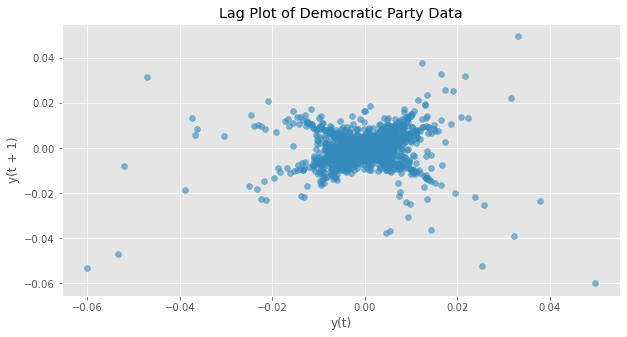

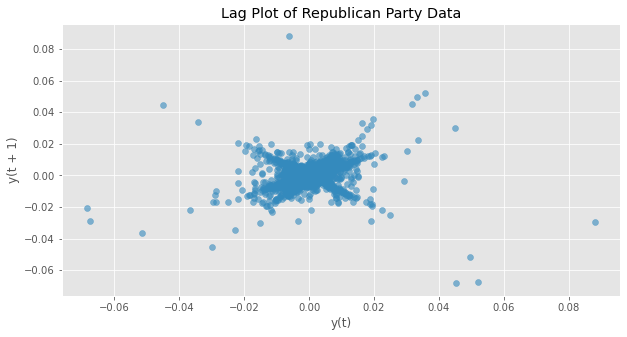

In [51]:
# Visualise the lag plot of the decomposed democratic data and republican data
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# Visualize the lag plot of the decomposed democratic data
plt.figure(figsize=(10, 5))
lag_plot(democratic_data_log_decompose, alpha=0.6)
plt.title("Lag Plot of Democratic Party Data")
plt.show()

# Visualize the lag plot of the decomposed republican data
plt.figure(figsize=(10, 5))
lag_plot(republican_data_log_decompose, alpha=0.6)
plt.title("Lag Plot of Republican Party Data")
plt.show()


Points clustering around zero suggests that there is no systematic pattern or trend in the relationship between the current observation and its lagged values at that specific lag. It suggests that past values at that lag don't strongly predict the current value, indicating a lack of a clear pattern or trend in the relationship.

### ARIMA Model

##### Model 1: Baseline model

In [52]:
# Convert the data in the congress_data3.diff set into a dataframe
congress_data3_diff_df = pd.DataFrame(congress_data3.diff())

congress_data3_diff_df.head()

,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo
modeldate,,,,,,
1995-11-09,NaN,NaN,NaN,NaN,NaN,NaN
1995-11-10,0.0,0.0,0.0,0.0,0.0,0.0
1995-11-11,0.0,0.0,0.0,0.0,0.0,0.0
1995-11-12,0.0,0.0,0.0,0.0,0.0,0.0
1995-11-13,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
congress_data3_diff_df.describe()

,dem_estimate,dem_hi,dem_lo,rep_estimate,rep_hi,rep_lo
count,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000,7668.000000
mean,-0.000641,-0.000808,-0.000474,-0.000167,-0.000349,0.000016
std,0.210246,0.211615,0.243559,0.229703,0.225326,0.274244
min,-4.754030,-3.564880,-7.371670,-5.579320,-4.044870,-8.017620
25%,-0.004045,-0.005685,-0.002730,-0.005605,-0.011460,-0.003620
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.003423,0.002830,0.006095,0.004320,0.002505,0.008980
max,2.840000,4.450090,3.703080,4.542860,5.363170,4.699120


In [54]:
congress_data3_diff_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7669 entries, 1995-11-09 to 2016-11-06
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dem_estimate  7668 non-null   float64
 1   dem_hi        7668 non-null   float64
 2   dem_lo        7668 non-null   float64
 3   rep_estimate  7668 non-null   float64
 4   rep_hi        7668 non-null   float64
 5   rep_lo        7668 non-null   float64
dtypes: float64(6)
memory usage: 739.4 KB


##### Democratic Party

In [55]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(congress_data3_diff_df['dem_estimate'], order=(0, 1, 1)) 
results_ARIMA = model.fit()

results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           dem_estimate   No. Observations:                 7669
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1065.124
Date:                Wed, 13 Dec 2023   AIC                          -2126.248
Time:                        23:26:01   BIC                          -2112.359
Sample:                    11-09-1995   HQIC                         -2121.484
                         - 11-06-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998      0.002   -516.211      0.000      -1.004      -0.996
sigma2         0.0442      0.000    287.510      0.000       0.044       0.045
===================================================================================
Ljung-Box (L1) (Q):                  78.46   Jarque-Bera (JB):           3153561.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -3.43
Prob(H) (two-sided):                  0.67   Kurtosis:                       102.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

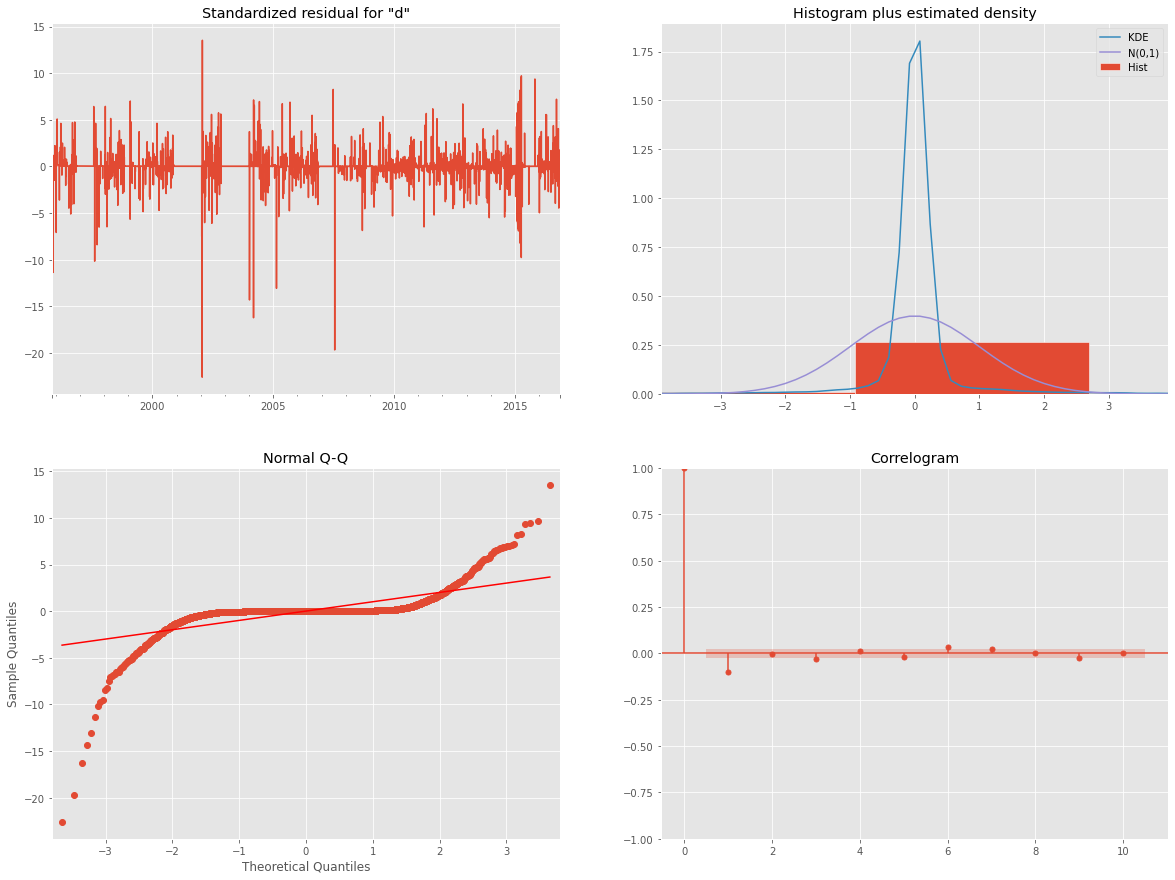

In [56]:
results_ARIMA.plot_diagnostics(figsize=(20, 15))
plt.show()

In the top right plot, we see that the blue KDE line follows the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

In [57]:
# Predict the data starting 2017
pred = results_ARIMA.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

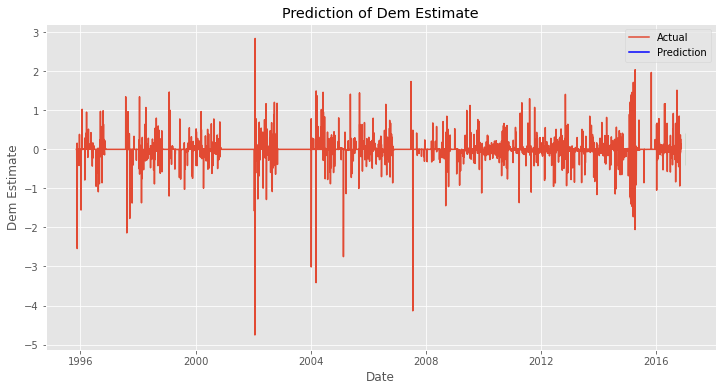

In [58]:
# Visualize the prediction above
plt.figure(figsize=(12, 6))
plt.plot(congress_data3_diff_df.index, congress_data3_diff_df['dem_estimate'], label='Actual')
plt.plot(pred_ci.index, pred.predicted_mean, color='b', label='Prediction')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='g', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Dem Estimate')
plt.title('Prediction of Dem Estimate')
plt.legend()
plt.show()


##### Republican Party

In [59]:
# Model the ARIMA model for the rep_estimate column in the congress_data3_diff_df dataset
model = ARIMA(congress_data3_diff_df['rep_estimate'], order=(1,0,0))
results_ARIMA = model.fit()
results_ARIMA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           rep_estimate   No. Observations:                 7669
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 420.223
Date:                Wed, 13 Dec 2023   AIC                           -834.447
Time:                        23:26:07   BIC                           -813.612
Sample:                    11-09-1995   HQIC                          -827.300
                         - 11-06-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.003     -0.067      0.947      -0.005       0.005
ar.L1         -0.0735      0.002    -29.771      0.000      -0.078      -0.069
sigma2         0.0525      0.000    521.253      0.000       0.052       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          10068841.74
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -3.63
Prob(H) (two-sided):                  0.00   Kurtosis:                       180.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Interpretation of the results above:
1. **Dependent Variable:** `rep_estimate`
   - This is the variable that your model is trying to predict or explain.

2. **Number of Observations:** `7669`
   - The total number of observations or data points used in the model.

3. **Model:** `ARIMA(1, 0, 0)`
   - This is an AutoRegressive Integrated Moving Average (ARIMA) model with parameters `(p=1, d=0, q=0)`.
     - `p=1`: One lag of the dependent variable is used in the autoregressive part.
     - `d=0`: No differencing is applied to make the series stationary.
     - `q=0`: There is no moving average component.

4. **Log Likelihood:** `420.223`
   - The log-likelihood is a measure of how well the model explains the observed data.

5. **AIC (Akaike Information Criterion):** `-834.447`
   - AIC is a measure that balances the goodness of fit and the complexity of the model. Lower AIC values indicate better-fitting models.

6. **BIC (Bayesian Information Criterion):** `-813.612`
   - Similar to AIC, BIC penalizes model complexity.

7. **Sample:** `11-09-1995 - 11-06-2016`
   - This indicates the time period covered by the data.

8. **Covariance Type:** `opg`
   - This specifies the type of covariance matrix used in the calculations, possibly robust or heteroskedasticity-robust standard errors.

9. **Coefficient Table:**
   - `const`: The constant term in the model is estimated to be `-0.0002` with a standard error of `0.003`. However, it is not statistically significant as the p-value is `0.947`, which is greater than the typical significance level of 0.05.
   - `ar.L1`: The coefficient for the lag 1 term in the autoregressive part is estimated to be `-0.0735` with a standard error of `0.002`. It is statistically significant, as the p-value is `0.000`.
   - `sigma2`: The estimated variance of the error term is `0.0525` with a standard error of `0.000`.

10. **Diagnostic Statistics:**
   - **Ljung-Box (Q) statistic for L1:** `0.01`
     - This tests the null hypothesis that the residuals are independently distributed. A high p-value (`0.91`) suggests that there is no evidence to reject the null hypothesis.
   - **Jarque-Bera (JB) statistic:** `10068841.74`
     - This tests the null hypothesis that the residuals have a normal distribution. A very low p-value (`0.00`) indicates strong evidence to reject the null hypothesis, suggesting non-normality in the residuals.
   - **Heteroskedasticity (H):** `0.64`
     - A measure of the variability of the residuals. A low p-value (`0.00`) suggests evidence against homoskedasticity.
   - **Skew:** `-3.63`
     - A measure of the asymmetry of the residuals. Negative values suggest a left-skewed distribution.
   - **Kurtosis:** `180.36`
     - A measure of the "tailedness" of the residuals. A very high value indicates heavy tails.

In summary, the ARIMA(1, 0, 0) model has been fitted to the data. The autoregressive term is statistically significant, but the constant term is not. The diagnostic statistics suggest some potential issues, such as non-normality in the residuals and evidence against homoskedasticity. These aspects may warrant further investigation or consideration of alternative model specifications.

In [60]:
# Predict the data starting 2017
pred = results_ARIMA.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

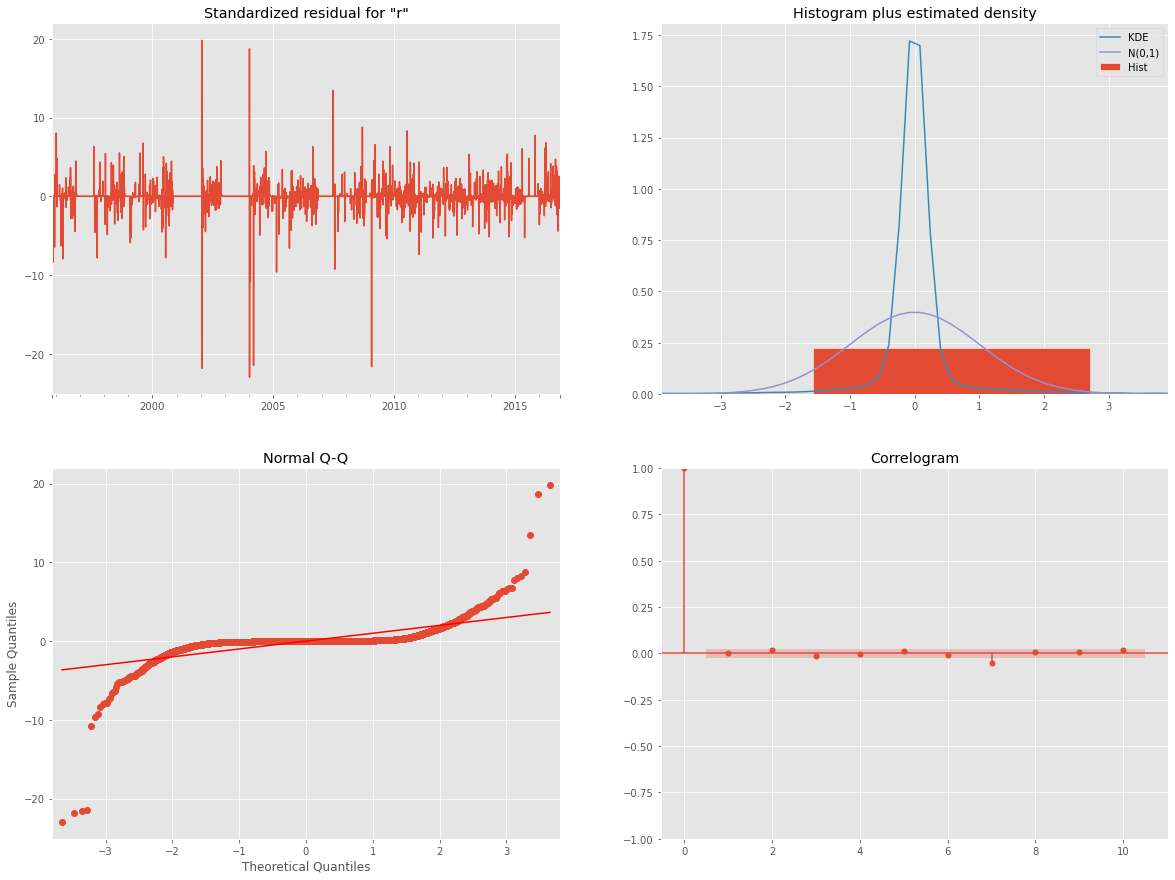

In [61]:
results_ARIMA.plot_diagnostics(figsize=(20, 15))
plt.show()

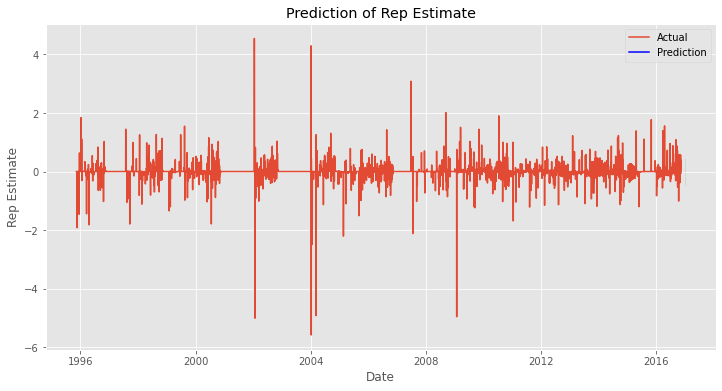

In [62]:
# Visualize the prediction above
plt.figure(figsize=(12, 6))
plt.plot(congress_data3_diff_df.index, congress_data3_diff_df['rep_estimate'], label='Actual')
plt.plot(pred_ci.index, pred.predicted_mean, color='b', label='Prediction')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='g', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Rep Estimate')
plt.title('Prediction of Rep Estimate')
plt.legend()
plt.show()

### Recommendation:

1. **Model Evaluation:**
   - Both ARIMA models have been fitted to the data, and it's essential to evaluate their performance. Examine the diagnostic statistics, goodness-of-fit measures, and assess how well the models capture the underlying dynamics of the political sentiment for the Democratic (dem_estimate) and Republican (rep_estimate) parties.

2. **Comparison with Alternative Models:**
   - Consider exploring alternative models or adjusting the existing ARIMA specifications to potentially improve model fit. This could involve experimenting with different orders for the autoregressive (AR), moving average (MA), and seasonal components.

3. **Residual Analysis:**
   - Investigate the residuals of both models. Ensure that there are no patterns or trends left unexplained by the models. The Ljung-Box test results provide insights into the autocorrelation of residuals, and addressing any significant autocorrelation may enhance the model's reliability.

4. **Incorporate Political Sentiments Data:**
   - From the analysis it was evident that predicting the voting results would not just be influenced by the past results. Incorporating factors that would affect the voter decisions would make the prediction more precise.

### Conclusion:

1. **Democratic Party Model (dem_estimate):**
   - The ARIMA(0, 1, 1) model for the Democratic Party indicates a strong negative effect in the moving average component (ma.L1), and the log likelihood is 1065.124. The model provides a plausible fit, but further investigation is needed to ensure its validity.

2. **Republican Party Model (rep_estimate):**
   - The ARIMA(1, 0, 0) model for the Republican Party includes a significant autoregressive term (ar.L1) and a log likelihood of 420.223. The model appears reasonable, but attention should be given to the large Jarque-Bera statistic and kurtosis, suggesting potential issues with the normality of residuals.

3. **Predicted Values:**
   - The rise in the forecasted percentage of voters or voter turnout was apparent, indicating an expected increase in the corresponding anticipated voter participation.

### Next Steps:

1. **Refinement of Model Orders:**
   - Experiment with different orders for the autoregressive and moving average components in both models. The objective is to find a balance between model complexity and goodness of fit.

2. **Diagnostic Analysis:**
   - Conduct a thorough diagnostic analysis, paying attention to the Ljung-Box (Q) statistics and Jarque-Bera tests. Address any autocorrelation or non-normality in residuals to enhance the models.

3. **Out-of-Sample Testing:**
   - Evaluate the models on out-of-sample data to assess their predictive accuracy. This step is crucial for determining how well the models generalize to new data, especially considering potential shifts in public sentiment over time.

4. **External Validation:**
   - Consider incorporating external factors or variables that may impact political sentiment, such as major events, economic indicators, or policy changes. This can enhance the models' explanatory power.

5. **Stakeholder Communication:**
   - Communicate the findings and limitations of the models to stakeholders. Clearly articulate the uncertainties associated with forecasting political sentiment and set realistic expectations for the models' predictive capabilities.

By iteratively refining the model specifications, addressing diagnostic issues, and incorporating external validation, we can enhance the robustness and reliability of the forecasting models for both the Democratic and Republican parties. Continuous monitoring and updates based on new data will further contribute to the models' accuracy over time.

#### Challenges Faced
1. Lack of political sentiment data to make the prediction better.
2. Lack of a clear pattern on the voting trends. 
Even though the trends seen per the lag visualisations were upward trending, it was  characterised by the increased population of the country or voter turn-out as time progressed. 